## Voluntary Assignment 3 Programming Exercise – R-Peak Detector

### Task 1: Downloading a Real ECG Measurement and Performing R-Peak Detection

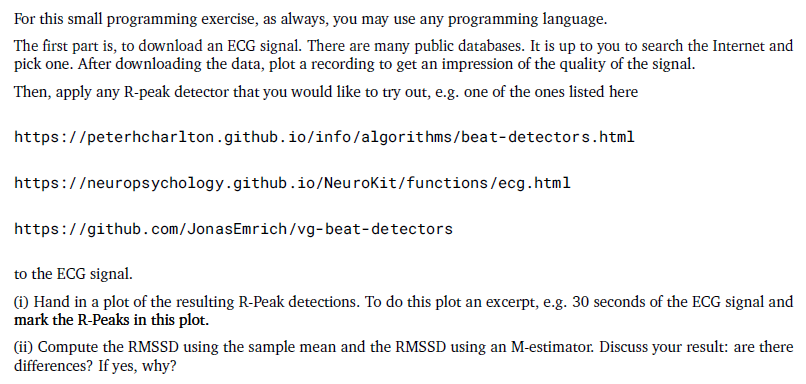

The R-Peak detector chosen was the implementation of Jiapu Pan and Willis J. Tompkins. “A Real-Time QRS Detection Algorithm”. In: IEEE Transactions on Biomedical Engineering BME-32.3 (1985), pp. 230–236.

In [82]:
import matplotlib.pyplot as plt
import kaggle
import numpy as np
import wfdb
import pandas as pd

In [ ]:
# Download latest version
kaggle.api.dataset_download_files('khyeh0719/ptb-xl-dataset', path='./data', unzip=True)

#### Load Data

In [83]:
filepath = './data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.1/records100/00000/'

ecg_data_1 = wfdb.rdsamp(filepath + "00001_lr")
ecg_data_2 = wfdb.rdsamp(filepath + "00002_lr")
ecg_data_3 = wfdb.rdsamp(filepath + "00003_lr")

ecg = np.concatenate((ecg_data_1[0], ecg_data_2[0], ecg_data_3[0]), axis=0)
metadata = ecg_data_1[1]
fs = metadata['fs']

print("Metadata")
print("Sampling frequency: ", fs, " Hz")
print("Number of samples: ", len(ecg))
print("Number of leads: ", metadata['n_sig'])
print("Lead names: ", metadata['sig_name'])
print("Voltage unit: ", metadata['units'][0])

Metadata
Sampling frequency:  100  Hz
Number of samples:  3000
Number of leads:  12
Lead names:  ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
Voltage unit:  mV


In [84]:
ecg_df = pd.DataFrame(ecg, columns=metadata['sig_name'])
print("ECG Shape: ", ecg_df.shape)
ecg_df

ECG Shape:  (3000, 12)


,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
0,-0.119,-0.055,0.064,0.086,-0.091,0.004,-0.069,-0.031,0.000,-0.026,-0.039,-0.079
1,-0.116,-0.051,0.065,0.083,-0.090,0.006,-0.064,-0.036,-0.003,-0.031,-0.034,-0.074
2,-0.120,-0.044,0.076,0.082,-0.098,0.016,-0.058,-0.034,-0.010,-0.028,-0.029,-0.069
3,-0.117,-0.038,0.080,0.077,-0.098,0.021,-0.050,-0.030,-0.015,-0.023,-0.022,-0.064
4,-0.103,-0.031,0.072,0.066,-0.087,0.021,-0.045,-0.027,-0.020,-0.019,-0.018,-0.058
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,-0.039,-0.240,-0.200,0.140,0.081,-0.220,0.113,0.061,-0.005,0.001,-0.013,0.010
2996,-0.034,-0.234,-0.200,0.134,0.083,-0.217,0.120,0.066,0.048,-0.001,0.095,0.031
2997,-0.029,-0.226,-0.198,0.127,0.085,-0.212,0.119,0.062,-0.070,0.001,0.229,0.018
2998,-0.048,-0.266,-0.218,0.158,0.085,-0.242,0.120,0.078,-0.209,-0.001,0.021,-0.008


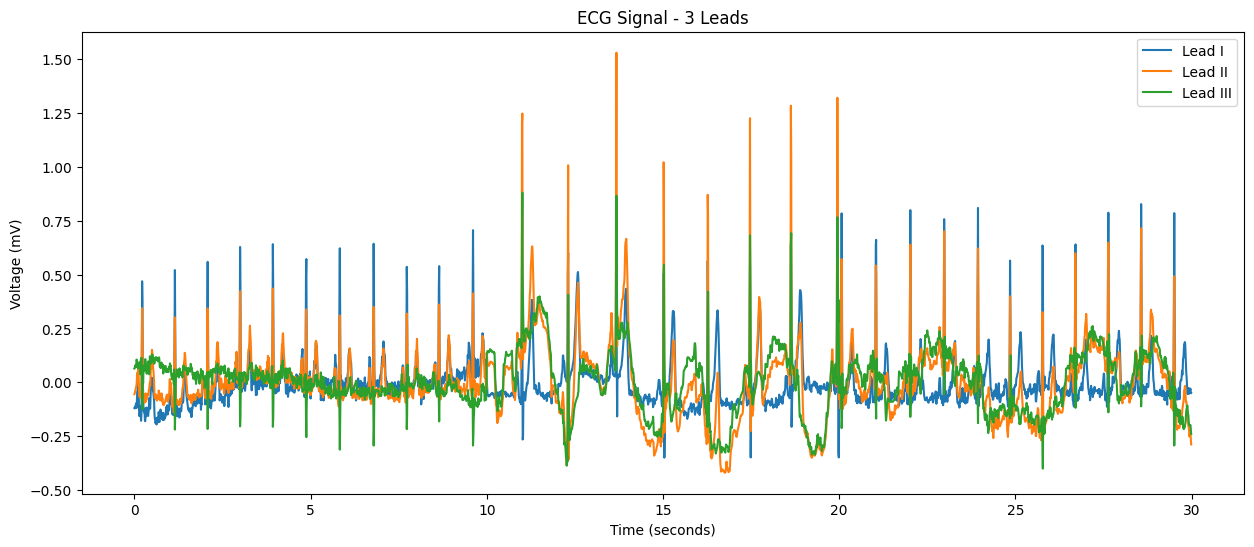

In [85]:
time_in_seconds = ecg_df.index / fs
    
plt.figure(figsize=(15, 6))
plt.plot(time_in_seconds, ecg_df["I"], label="Lead I")
plt.plot(time_in_seconds, ecg_df["II"], label="Lead II")
plt.plot(time_in_seconds, ecg_df["III"], label="Lead III")
plt.title('ECG Signal - 3 Leads')
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (seconds)')
plt.legend()
plt.show()

#### R-Peak Detection

In [86]:
def plot_ecg_with_r_peaks(ecg_df, r_peaks, lead_name, detector_name, sampling_rate):    
    time_in_seconds = ecg_df.index / sampling_rate
    
    plt.figure(figsize=(15, 6))
    plt.plot(time_in_seconds, ecg_df[lead_name], label='ECG Signal')
    plt.plot(r_peaks / sampling_rate, ecg_df[lead_name][r_peaks], 'ro', label='R-peaks')
    plt.title(f'ECG Signal - Lead {lead_name} with R-peaks - {detector_name} Detector')
    plt.ylabel('Voltage (mV)')
    plt.xlabel('Time (seconds)')
    plt.legend()
    plt.show()

In [87]:
from ecgdetectors import Detectors

detectors = Detectors(fs)

[34, 125, 207, 309, 397, 491, 582, 683, 782, 868, 971, 1107, 1239, 1370, 1504, 1637, 1749, 1874, 2003, 2113, 2205, 2301, 2402, 2493, 2587, 2681, 2767, 2860, 2950]
Number of R-peaks:  29


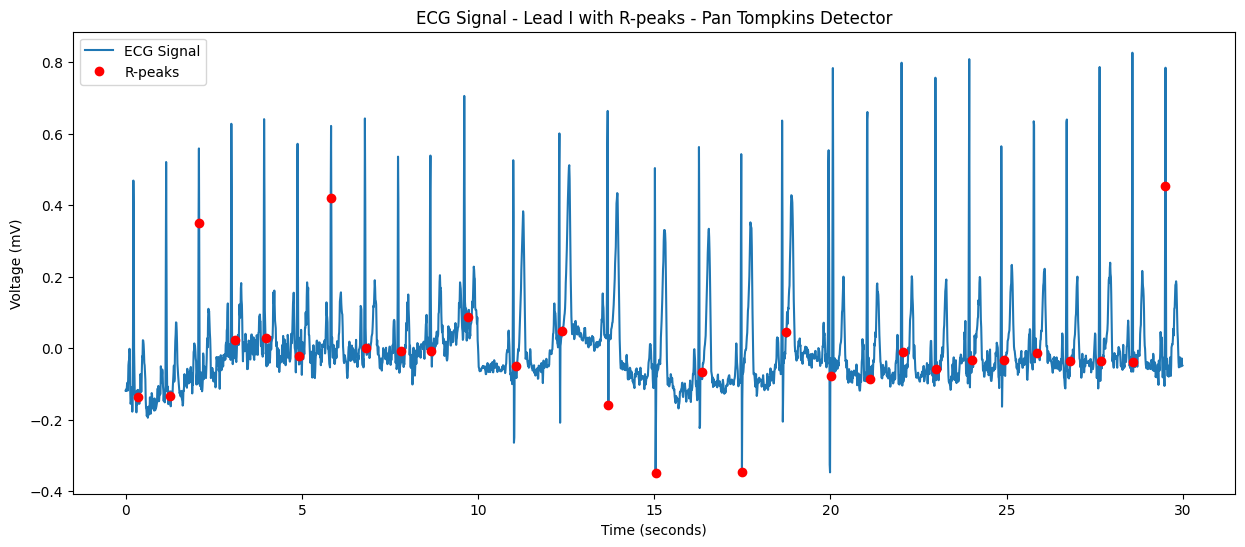

In [88]:
r_peaks_lead_I = detectors.pan_tompkins_detector(ecg_df["I"])

print(r_peaks_lead_I)
print("Number of R-peaks: ", len(r_peaks_lead_I))

r_peaks_lead_I_array = np.array(r_peaks_lead_I)
plot_ecg_with_r_peaks(ecg_df, r_peaks_lead_I_array, "I", "Pan Tompkins", fs)

[34, 125, 207, 309, 397, 491, 582, 683, 782, 868, 971, 1107, 1239, 1370, 1504, 1637, 1749, 1874, 2003, 2113, 2205, 2301, 2402, 2493, 2587, 2681, 2767, 2860, 2950]
Number of R-peaks:  29


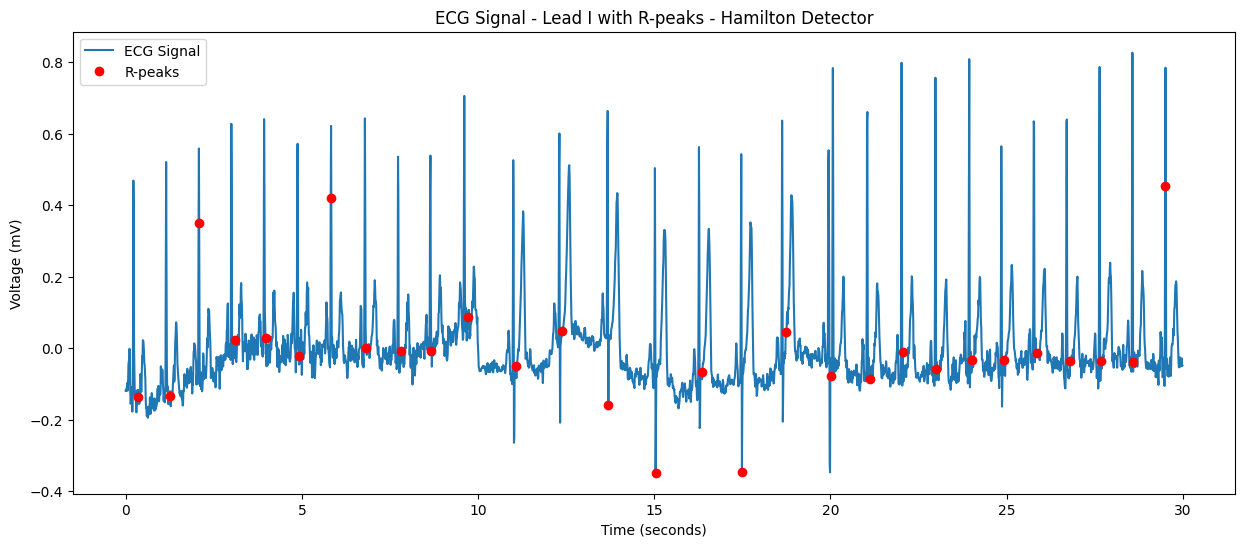

In [89]:
r_peaks_lead1 = detectors.hamilton_detector(ecg_df["I"])

print(r_peaks_lead_I)
print("Number of R-peaks: ", len(r_peaks_lead_I))

r_peaks_lead_I_array = np.array(r_peaks_lead_I)
plot_ecg_with_r_peaks(ecg_df, r_peaks_lead_I_array, "I", "Hamilton", fs)

#### RMSSD - Metric for Heart-Rate-Variability

In [90]:

rr_intervals = r_peaks_lead_I_array[1:] - r_peaks_lead_I_array[:-1]
print("RR Intervals: ", rr_intervals)
print("Number of RR Intervals: ", len(rr_intervals))

RR Intervals:  [ 91  82 102  88  94  91 101  99  86 103 136 132 131 134 133 112 125 129
 110  92  96 101  91  94  94  86  93  90]
Number of RR Intervals:  28


##### Notes

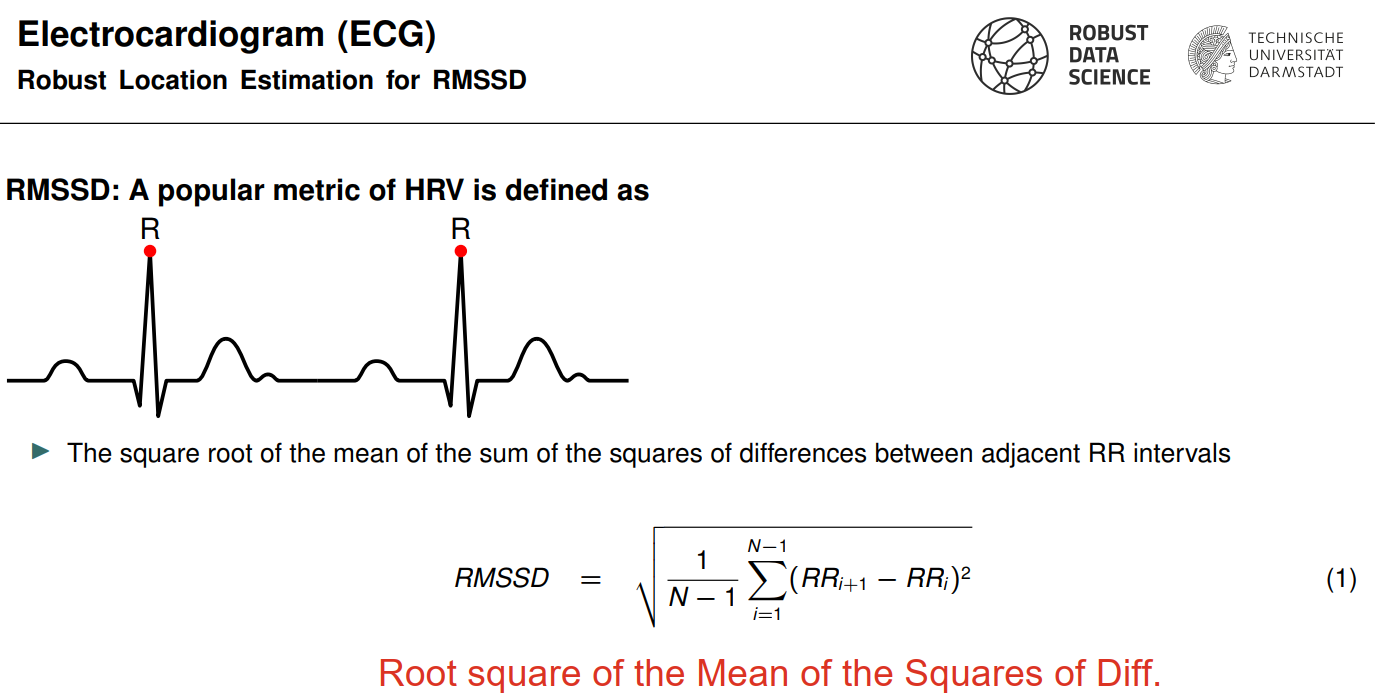
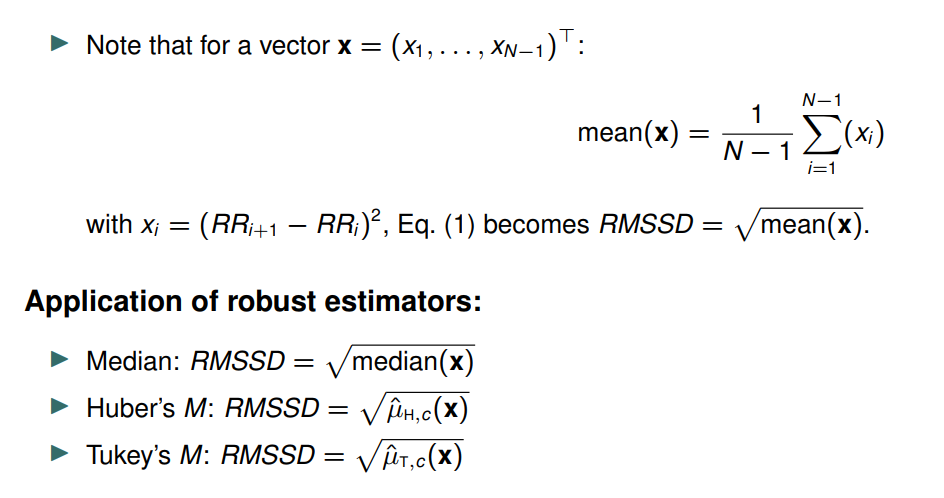

##### Estimation with Sample Mean

In [91]:
squared_rr_intervals = rr_intervals ** 2
rmssd = np.sqrt(squared_rr_intervals.mean())

print("Estimated location of the squared RR-Intervals: ", squared_rr_intervals.mean())
print("RMSSD with sample mean:", rmssd)

Estimated location of the squared RR-Intervals:  11139.0
RMSSD with sample mean: 105.54146104730596


##### Estimation with Huber's Estimator

In [92]:

from scipy import stats

def weight_hubers_function(x, c):
    if abs(x) <= c:
        return 1
    else:
        return abs(c/x)

def weight_hubers_function_vectorized(x: np.ndarray, c) -> np.ndarray:
    return np.where(np.abs(x) <= c, 1, np.abs(c / x))

def phi_hubers_function(x: float, c: float) -> float:
    return weight_hubers_function(x, c)*x

def m_estimator_loc_huber(samples, weight_function, initial_mean_estimate = None, std_estimate=None, epsilon=0.001, c = 1):
    if initial_mean_estimate is None:
        initial_mean_estimate = np.median(samples)
    if std_estimate is None:
        std_estimate = stats.median_abs_deviation(samples, scale='normal')
    
    mu_i = initial_mean_estimate
    sigma = std_estimate
    iterations_count = 0
    diff = 1

    while diff > epsilon:
        iterations_count += 1
        z_scores = (samples - mu_i) / sigma
        weights = weight_function(z_scores, c)
        mu_i_1 = np.sum(weights * samples) / np.sum(weights)
        diff = abs(mu_i - mu_i_1)/sigma
        mu_i = mu_i_1
    
    return mu_i, iterations_count, diff

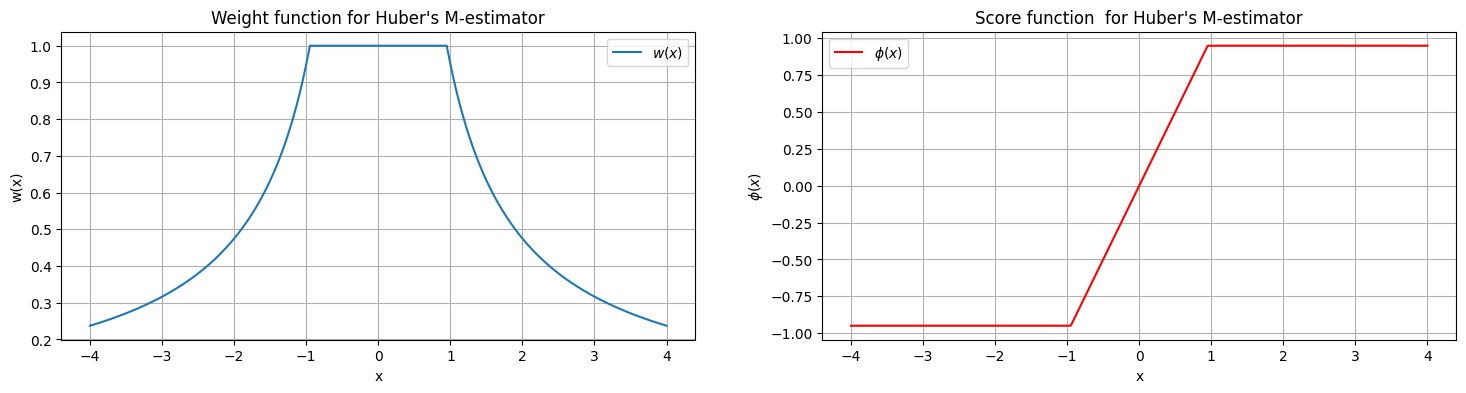

In [93]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

x_array = np.linspace(-4, 4, 1000)
axes[0].plot(x_array, [weight_hubers_function(x, 0.95) for x in x_array], label='$w(x)$')
axes[1].plot(x_array, [phi_hubers_function(x, 0.95) for x in x_array], label='$\phi(x)$', color='red')

axes[0].set_title("Weight function for Huber's M-estimator")
axes[0].set_xlabel('x')
axes[0].set_ylabel('w(x)')
axes[0].legend()
axes[0].grid()

axes[1].set_title("Score function  for Huber's M-estimator")
axes[1].set_xlabel('x')
axes[1].set_ylabel('$\phi(x)$')
axes[1].legend()
axes[1].grid()

plt.show()

In [94]:
squared_rr_intervals = rr_intervals ** 2
loc_squared_rr, iterations_count, diff = m_estimator_loc_huber(squared_rr_intervals, weight_hubers_function_vectorized, c=0.95, epsilon=0.0001)

print("Estimated location of the squared RR-Intervals: ", loc_squared_rr)
print("Number of iterations: ", iterations_count)

rmssd_huber = np.sqrt(loc_squared_rr)

print("RMSSD with Huber's M-Estimator:", rmssd_huber)

Estimated location of the squared RR-Intervals:  9751.808413895336
Number of iterations:  7
RMSSD with Huber's M-Estimator: 98.75124512579745
